# Glass Identification Project

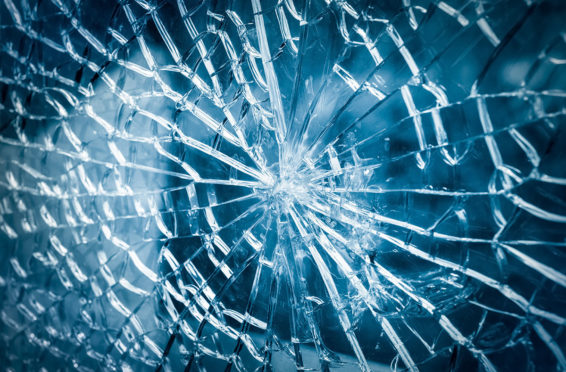
By Mónica Atiaga

Batch - DSNB1222

## Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
### Attribute Information
- Id number: 1 to 214
- RI: refractive index
- Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
- Mg: Magnesium
- Al: Aluminum
- Si: Silicon
- K: Potassium
- Ca: Calcium
- Ba: Barium
- Fe: Iron
- Type of glass: (class attribute)
    1. building_windows_float_processed
    2. building_windows_non_float_processed
    3. vehicle_windows_float_processed
    4. vehicle_windows_non_float_processed (none in this database)
    5. containers
    6. tableware
    7. headlamps
    
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7)

**Predict:** Type of glass




### Dataset Link-
https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv

https://github.com/dsrscientist/dataset3


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Custom functions

In [2]:
def show_percentage(ax, total):
    ''' Shows the representative percentage in each bar in a countplot.'''
    for p in ax.patches:
        percentage = f"{100 * p.get_height()/total:.1f} %"
        x = p.get_x() + p.get_width() / 2 - 0.02
        y = p.get_height()
        ax.annotate(percentage, (x, y), fontsize=10, ha='center')

In [3]:
# Defining columns names 
columns = ['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']

In [4]:
# Retrive the dataset using the raw address
url = 'https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv'
df = pd.read_csv(url, names=columns)
df

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# 1. EDA Exploratory Data Analysis
## 1.1 First view 

In [5]:
# checking the dimension of the dataset
df.shape

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (214, 11)

The column headers in the dataset: Index(['Id number', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')


This dataset contains 214 rows and 11 columns. Out of which 1 is the target variable "Type of glass" and the remaining 10 are independent variables described in the above section Attribute information.

In [6]:
# checking the types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number      214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Al             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type of glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


There are two types of data (int64 and float64 ) present in the dataset.

Id number, Type of glass: int64
RI, Na, Mg, Al, Si, K, Ca, Ba, Fe: float64

The data set doesn't have null values.

## 1.2 Missing values


In [7]:
# checking the null values
missing_val = df.isnull().sum().to_frame()

missing_val

,0
Id number,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0


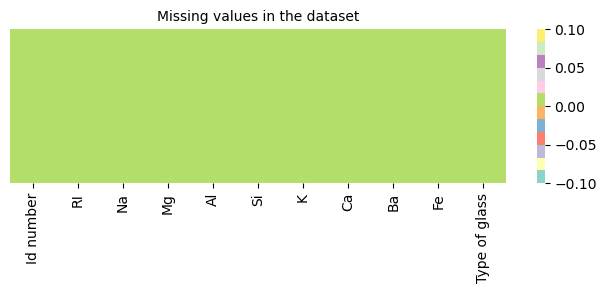

In [8]:
# Let's visualize it using heatmap
plt.figure(figsize=(8,2))
sns.heatmap(df.isnull(), yticklabels=False, cmap='Set3')
plt.title('Missing values in the dataset', fontsize=10);

The data set doesn't have null values.

## 1.3 Features Analysis

### 1.3.1 Unique values
Now, we are going to review the unique values of each column in the dataset in order to understand the data and the features.

In [9]:
# Reviewing the number of unique values in each feature and the target
info_df = df.nunique().to_frame('No. of unique values')
info_df['type'] = df.dtypes.values
info_df

,No. of unique values,type
Id number,214,int64
RI,178,float64
Na,142,float64
Mg,94,float64
Al,118,float64
Si,133,float64
K,65,float64
Ca,143,float64
Ba,34,float64
Fe,32,float64


About the number of unique values:
1. Id number column has the same unique values as the dataset rows, this column only serves to identify each record but doesn't influence the target variable. There for we can drop it.
2. RI (refractive index) column has 178 unique values
3. Na (Sodium) column has 142 unique values
4. Mg (Magnesium) column has 94 unique values
5. Al (Aluminum) column has 118 unique values
6. Si (Silicon) column has 133 unique values
7. K (Potassium) column has 65 unique values
8. Ca (Calsium) column has 143 unique values
9. Ba (Barium) column has 34 unique values
10. Fe (Iron) column has 32 unique values
11. Types of glass (the target variable) has 6 unique values.
    
    
Next, we will remove the column: Id number for the reasons explained previously. 

In [10]:
# Dropping the column Id number
df.drop(['Id number'], axis=1, inplace=True)
df.sample(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6
75,1.51590,13.02,3.58,1.51,73.12,0.69,7.96,0.00,0.00,2
70,1.51574,14.86,3.67,1.74,71.87,0.16,7.36,0.00,0.12,2
40,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.00,0.00,1
136,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,0.00,0.12,2
20,1.51750,12.82,3.55,1.49,72.75,0.54,8.52,0.00,0.19,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00,1
179,1.51852,14.09,2.19,1.66,72.67,0.00,9.32,0.00,0.00,6
113,1.51892,13.46,3.83,1.26,72.55,0.57,8.21,0.00,0.14,2
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [11]:
# checking the new dimension of the dataset

print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (214, 10)

The column headers in the dataset: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass'], dtype='object')


Now the dataset contains 214 rows and 10 columns. The target variable and 9 independent variables.

#### 1.3.1.1 Type of glass unique values


In [12]:
# Checking the target variable
df['Type of glass'].value_counts().to_frame()

,Type of glass
2,76
1,70
7,29
3,17
5,13
6,9


As we saw in the columns description, the target variable "Type of glass" could have the following values:

1. building_windows_float_processed
2. building_windows_non_float_processed
3. vehicle_windows_float_processed
4. vehicle_windows_non_float_processed (none in this database)
5. containers
6. tableware
7. headlamps

As we can see in the dataset there are present types of glass: 1, 2, 3, 5, 6, and 7. 

To set a cutoff for the target variable might be an interesting thing to do. We can divide into window glass (classes 1-4) and non-window glass (classes 5-7). 

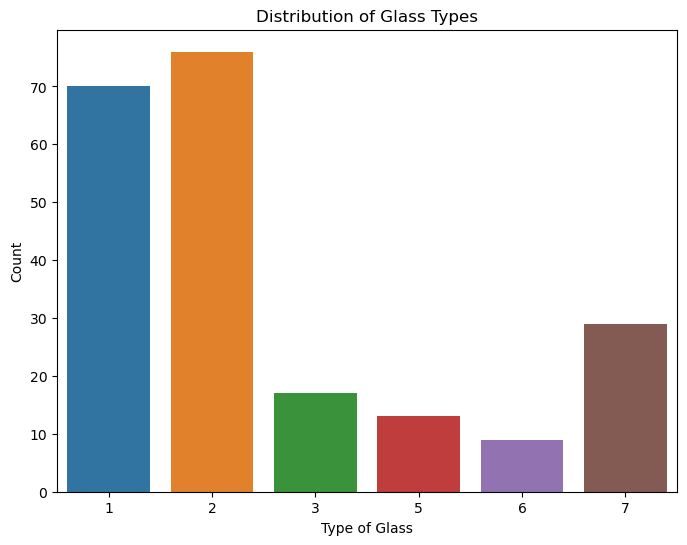

In [13]:
# Visualize the distribution of classes (glass types)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Type of glass')
plt.title('Distribution of Glass Types')
plt.xlabel('Type of Glass')
plt.ylabel('Count')
plt.show()

In [14]:
# Categories:  1 window glass(1-4) and 7 non-window glass(5-7)
type_categories = [1, 7]
conditions =[
    (df['Type of glass'] <= 4 ),
    (df['Type of glass'] > 4)
]

# Setting the cutoff for the dependet variable Type of glass
df['Type'] = np.select(conditions, type_categories, default=0 )
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1


In [15]:
# Checking the target variable
df['Type'].value_counts().to_frame()

,Type
1,163
7,51


Now our dependent variable has two unique values: 
- 1: for window glass
- 7: for non-window glass

And we can observe the dataset is imbalanced. There are significantly more records(163) for window glass type compared to the 51 non-window glass type. Later we will rectify it by using the oversampling method in the later part.

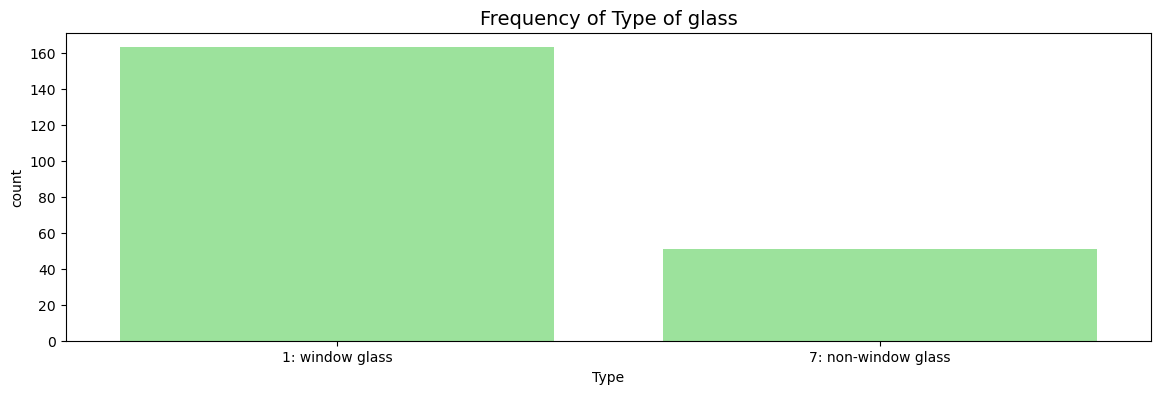

In [16]:
# Visualizing the Frequency of Type of glass
plt.figure(figsize = (14, 4), facecolor = "white")
sns.countplot(data=df, x='Type', color='lightgreen')
plt.xticks((0, 1), ['1: window glass', '7: non-window glass'], size=10)
plt.title(f"Frequency of Type of glass", size=14)
plt.show()

#### 1.3.1.2 Independent variables unique values


In [17]:
# Checking the value counts of each column (independent variables)
for i in range(9):
    print(df.iloc[:,i].value_counts(),'\n')

1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64 

13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64 

0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64 

1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64 

72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64 

0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
        ..
0.44     1
0.07     1
0.73     1
0.70     1
1.41     1
Name: K, Length: 65, dtype: int64 

8.03    5
8.43    5
9.57    4
8.79    

### 1.3.2 Summary statistics of the numerical variables


In [18]:
# Summary statistics of numerical columns
stats = df.describe()
stats

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374,2.429907
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739,2.562321
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000,1.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000,1.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000,7.000000


In [19]:
# Contrast the mean with the 50th percentile
(stats.loc['mean',:] - stats.loc['50%',:]).sort_values(ascending=False)

Type             1.429907
Type of glass    0.780374
Ca               0.356963
Ba               0.175047
Na               0.107850
Al               0.084907
Fe               0.057009
RI               0.000685
K               -0.057944
Si              -0.139065
Mg              -0.795467
dtype: float64

In [20]:
# Contrast the maximum value in each colum with 2 times the std plus the mean 
(stats.loc['max',:] - (stats.loc['mean',:] + 2 * stats.loc['std',:] ) ).sort_values(ascending=False)

K                4.408560
Ca               4.386730
Na               2.338942
Ba               1.980515
Si               1.209974
Al               1.056554
Fe               0.258113
Type of glass    0.012149
RI               0.009491
Type            -0.554548
Mg              -1.079348
dtype: float64

**Observations:**

- The summary of the dataset looks perfect since there are no negative/invalid values present.
- The counts of all the columns are the same which means there are no missing values in the dataset.
- The dependent variable {Type} is categorical with two unique values after the cutoff.
- The mean value is larger than the median(50%) in columns { Ca, Ba, Na, Al, Fe}, which means the data is skewed to the right in these columns.
- The column {RI} the median (50%) and the mean are very close.
- The data in the columns {Mg, Si, K} have a small difference between the mean value less than the median which means the data is skewed to the left.
- The dataset could present outliers in the columns {K, Ca, Na, Ba, Si, Al, Mg}, however in the univariate analysis of each feature we will verify it.
- The features are not on the same scale. Si has a mean of 72.65 while Fe has a mean value of 0.057. Features should be on the same scale for algorithms such as logistic regression to converge smoothly.

### 1.3.3 Duplicates

In [21]:
# Searching for duplicated values
df[df.duplicated()].shape

(1, 11)

In [22]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1,1


In [23]:
# Drop duplicated values
df.drop_duplicates(inplace=True)

In [24]:
df[df.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type


Since there is only one row duplicated we can drop it in order to avoid noise in the prediction model.

## 1.4 Data Visualization
### 1.4.1 Univariate Analysis
#### 1.4.1.1 Target feature

In [25]:
# Special Functions are at the end of the analysis 

In [26]:
# Set the custom palette
sns.set_palette('Pastel1')

,Type
1,162
7,51


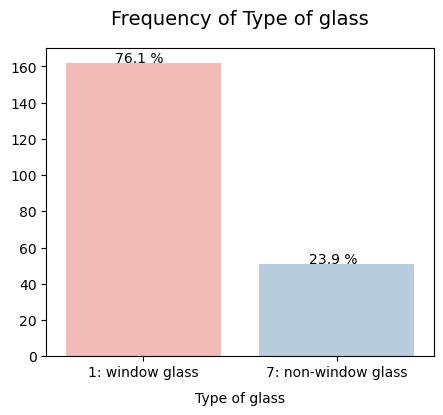

In [27]:
# Visualize the frequency by Type of glass (with the cutoff)
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Type', data=df)
show_percentage(ax, len(df)) 

plt.xlabel('Type of glass', size=10, labelpad=8)
plt.ylabel('', size=10, labelpad=8)
plt.xticks((0, 1), ['1: window glass', '7: non-window glass'], size=10)
plt.title(f"Frequency of Type of glass", size=14, y=1.05)

df['Type'].value_counts().to_frame()

162 (76.1%) records are classified as window glass and only 51 (23.9%) records as non-window glass of the total dataset. The target variable is imbalanced.

#### 1.4.1.2 Numerical columns

In [28]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass',
       'Type'],
      dtype='object')

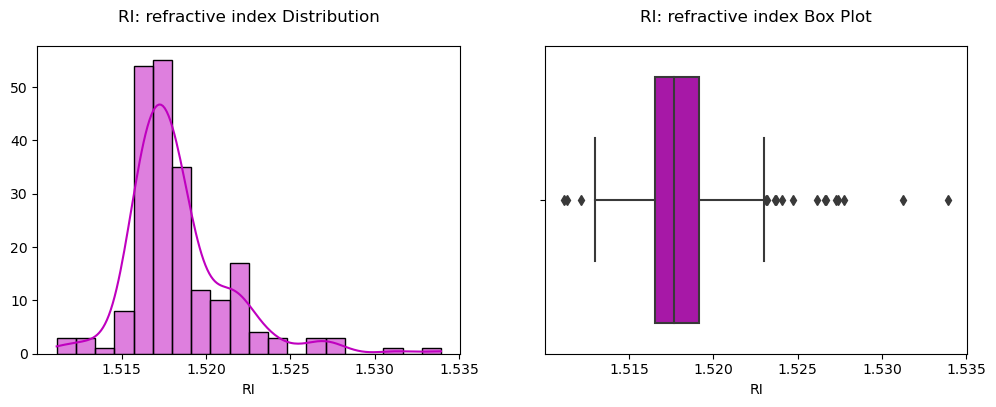

Skewness of RI : 1.6480173737729908


In [29]:
#Visualize RI: refractive index distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['RI'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['RI'], ax=axes[1], color='m')

axes[0].set_title('RI: refractive index Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('RI: refractive index Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of RI
print(f"Skewness of RI : {df.RI.skew()}")

The distribution of RI is slightly skewed to the right. There are outliers present in the Box plot of RI.

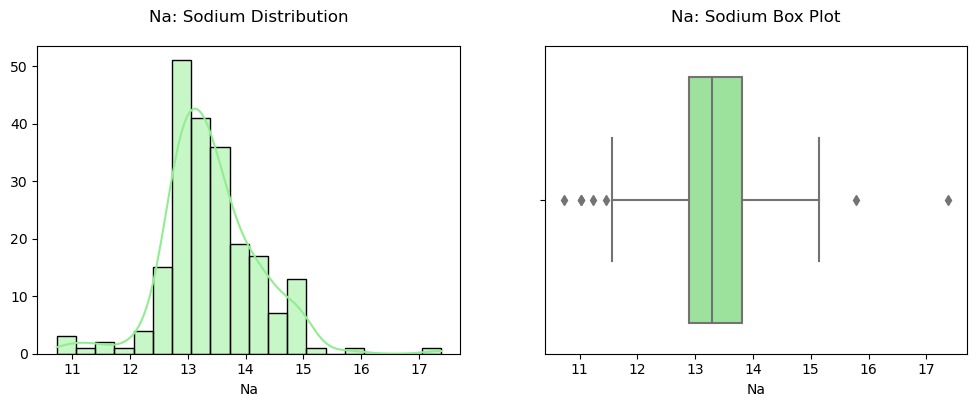

Skewness of Na : 0.46569850922621137


In [30]:
#Visualize Na: Sodium  distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Na'], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df['Na'], ax=axes[1], color='lightgreen')

axes[0].set_title('Na: Sodium Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Na: Sodium Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of Na
print(f"Skewness of Na : {df.Na.skew()}")

The distribution of Na(Sodium) is slightly skewed to the right. There are outliers present in the Box plot of Na.

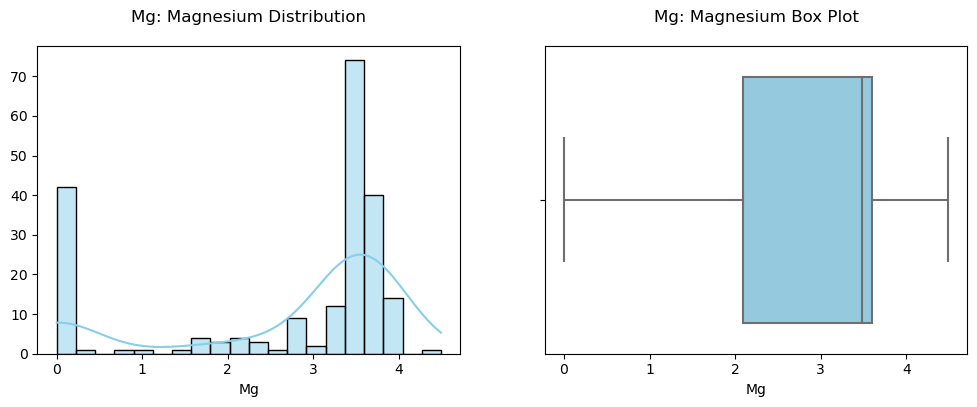

Skewness of Mg : -1.1460958436967303


In [31]:
#Visualize Mg: Magnesium distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Mg'], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df['Mg'], ax=axes[1], color='skyblue')

axes[0].set_title('Mg: Magnesium Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Mg: Magnesium Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of Mg
print(f"Skewness of Mg : {df.Mg.skew()}")

The distribution of Mg(Magnesium) is slightly skewed to the left. There are no outliers present. 

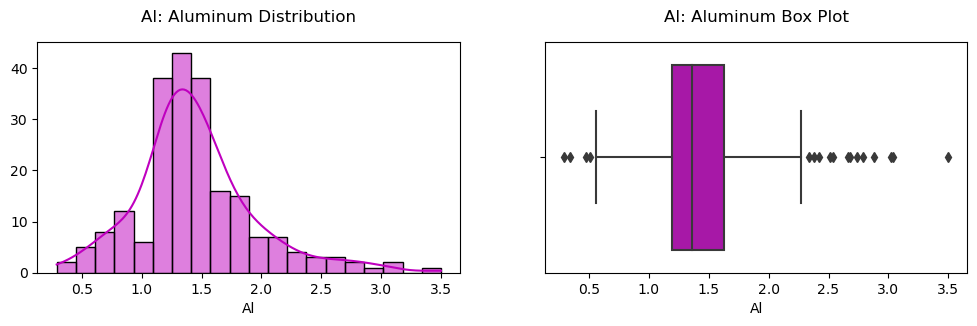

Skewness of Al : 0.9384017147473468


In [32]:
#Visualize Al: Aluminum distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df['Al'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['Al'], ax=axes[1], color='m')

axes[0].set_title('Al: Aluminum Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Al: Aluminum Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of Al
print(f"Skewness of Al : {df.Al.skew()}")

The distribution of Al(Aluminum) is slightly skewed to the right with the presence of outliers in the box plot. 

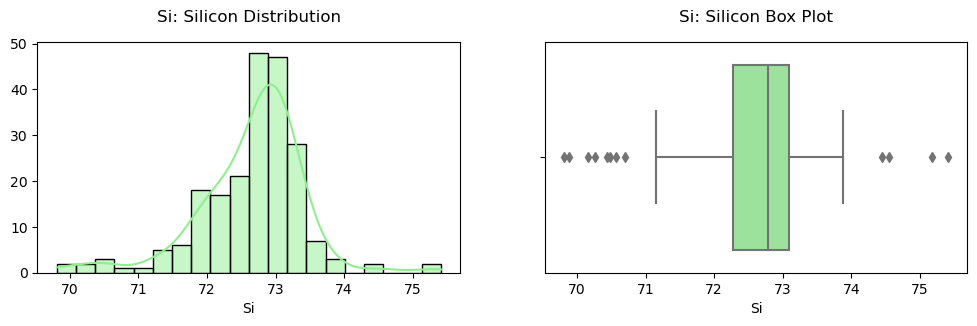

Skewness of Si : -0.7446460155618705


In [33]:
#Visualize Si: Silicon distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df['Si'], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df['Si'], ax=axes[1], color='lightgreen')

axes[0].set_title('Si: Silicon Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Si: Silicon Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of Si
print(f"Skewness of Si : {df.Si.skew()}")

The distribution of Si(Silicon) is slightly skewed to the left. There are some outliers present as we can see in the boxplot. 

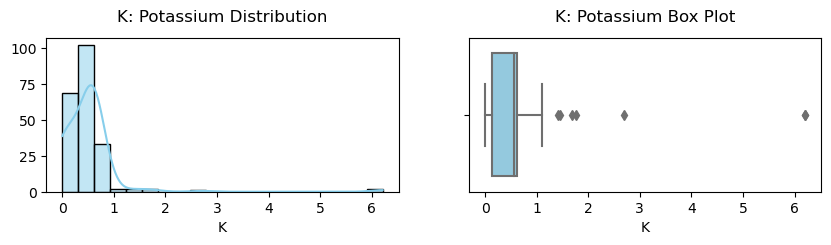

Skewness of K : 6.545428649493799


In [34]:
#Visualize K: Potassium distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 2))

sns.histplot(df['K'], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df['K'], ax=axes[1], color='skyblue')

axes[0].set_title('K: Potassium Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('K: Potassium Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of K
print(f"Skewness of K : {df.K.skew()}")

The distribution of K(Potassium) is skewed to the right. There are outliers present as we can see in the boxplot.

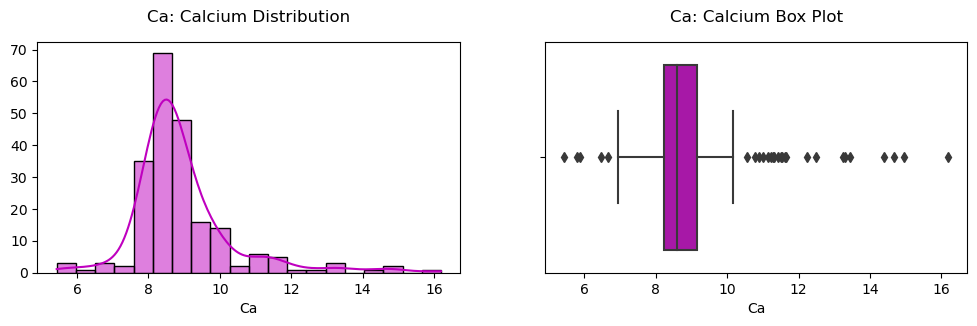

Skewness of Ca : 2.050752066632569


In [35]:
#Visualize Ca: Calcium distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df['Ca'], kde=True , bins=20, ax=axes[0], color='m')
sns.boxplot(df['Ca'], ax=axes[1], color='m')

axes[0].set_title('Ca: Calcium Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Ca: Calcium Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of Ca
print(f"Skewness of Ca : {df.Ca.skew()}")

The distribution of Ca(Calcium) is skewed to the right. There are outliers present as we can see in the boxplot.

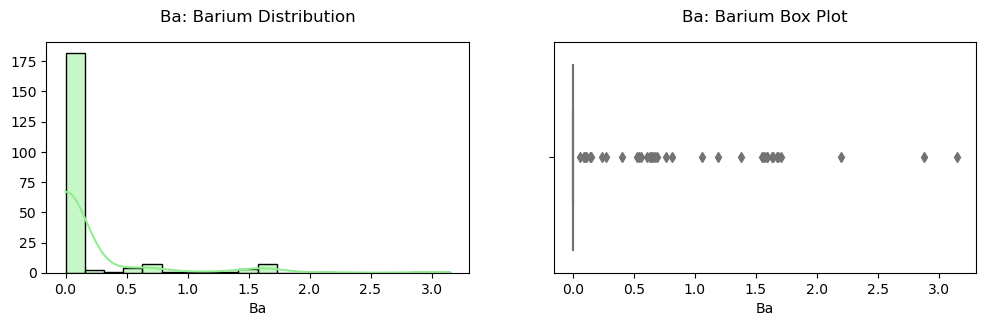

Skewness of Ba : 3.406748836984873


In [36]:
#Visualize Ba: Barium distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 3))

sns.histplot(df['Ba'], kde=True , bins=20, ax=axes[0], color='lightgreen')
sns.boxplot(df['Ba'], ax=axes[1], color='lightgreen')

axes[0].set_title('Ba: Barium Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Ba: Barium Box Plot', size=12, y=1.05)
plt.show()

# Show the skewness of Ba
print(f"Skewness of Ba : {df.Ba.skew()}")

The distribution of Ba(Barium) is skewed to the right. There are outliers present as we can see in the boxplot.

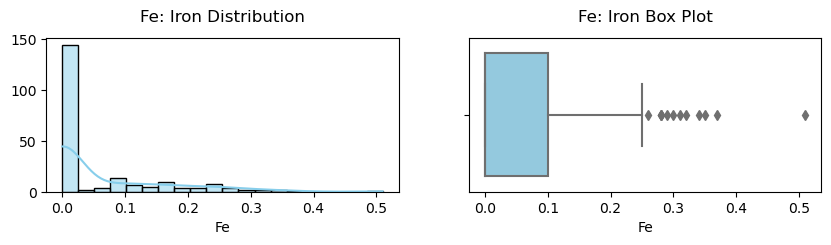

Skewness of Fe : 1.747173207250088


In [37]:
#Visualize Fe: Iron distribution
fig, axes = plt.subplots(1, 2, figsize=(10, 2))

sns.histplot(df['Fe'], kde=True , bins=20, ax=axes[0], color='skyblue')
sns.boxplot(df['Fe'], ax=axes[1], color='skyblue')

axes[0].set_title('Fe: Iron Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Fe: Iron Box Plot', size=12, y=1.05)

plt.show()

# Show the skewness of Fe
print(f"Skewness of Fe : {df.Fe.skew()}")

The distribution of Fe(Iron) is skewed to the right. There are some outliers present as we can see in the boxplot.

#### 1.4.1.3 Univariate Boxplot

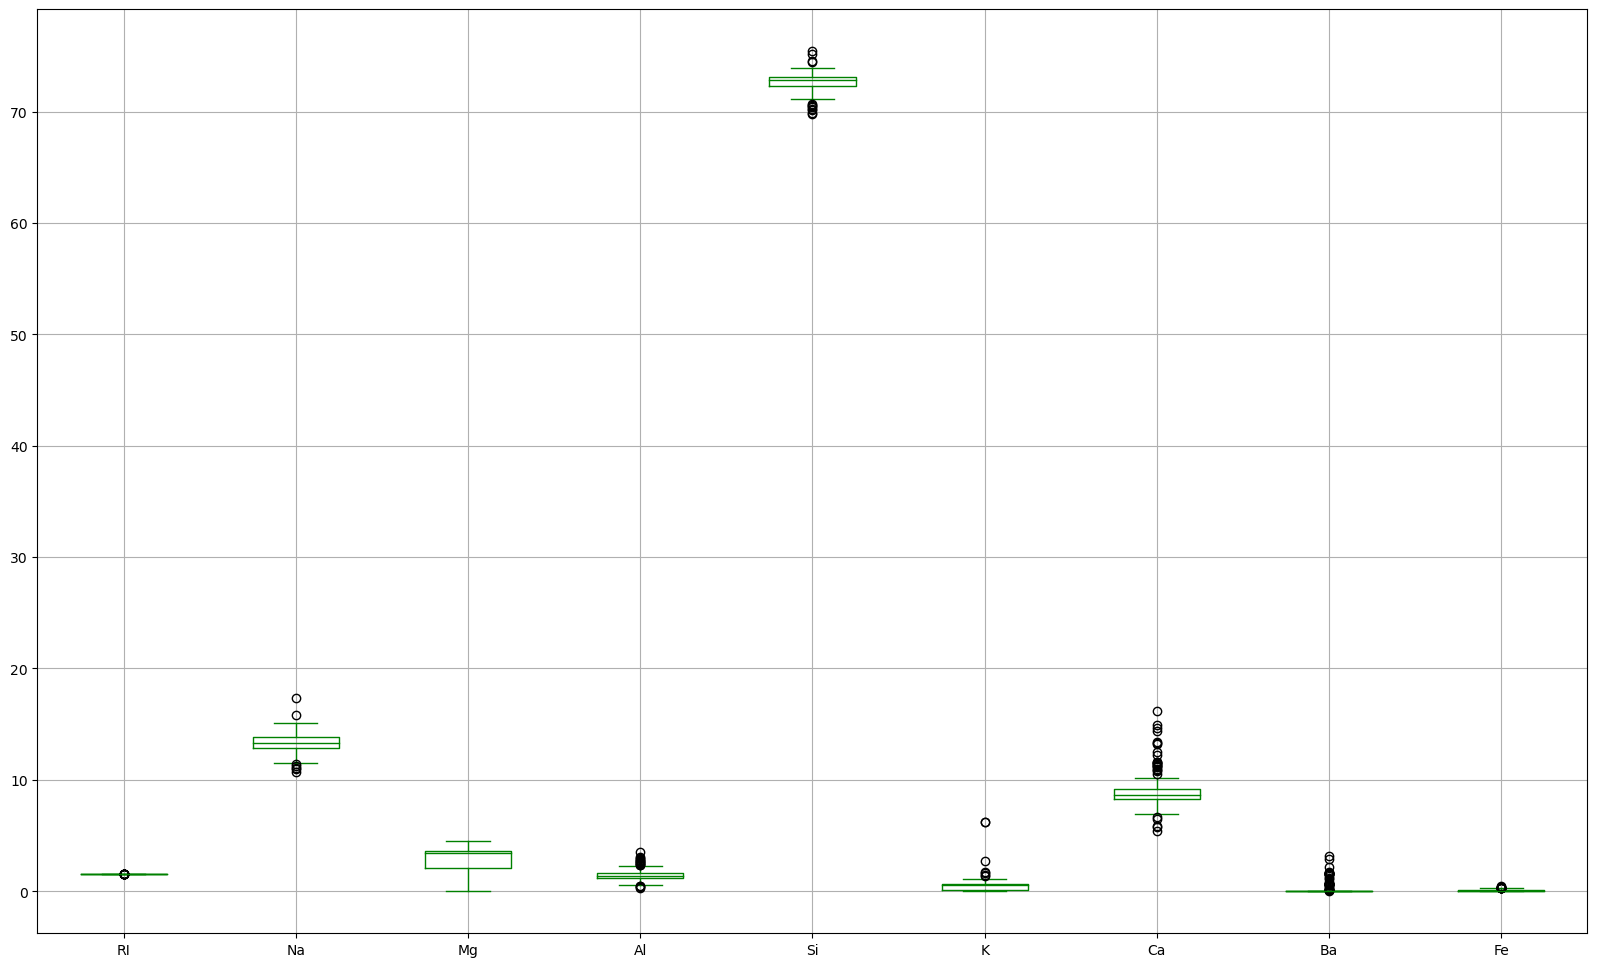

In [38]:
# Draw a boxplot for each independent variable 
df.boxplot(column=['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'], figsize=(20,12), color='green')
plt.show()

- The main component of glass is Si(Silicon), more than 70% of composition.
- The combination of Si(Silicon), Na(Sodium), and Ca(Calcium) is about 90% of the composition.
- Fe(Iron) is the least important component

### 1.4.2  Bivariate Analysis
#### 1.4.2.1 BoxPlot Analysis:  Finding outliers


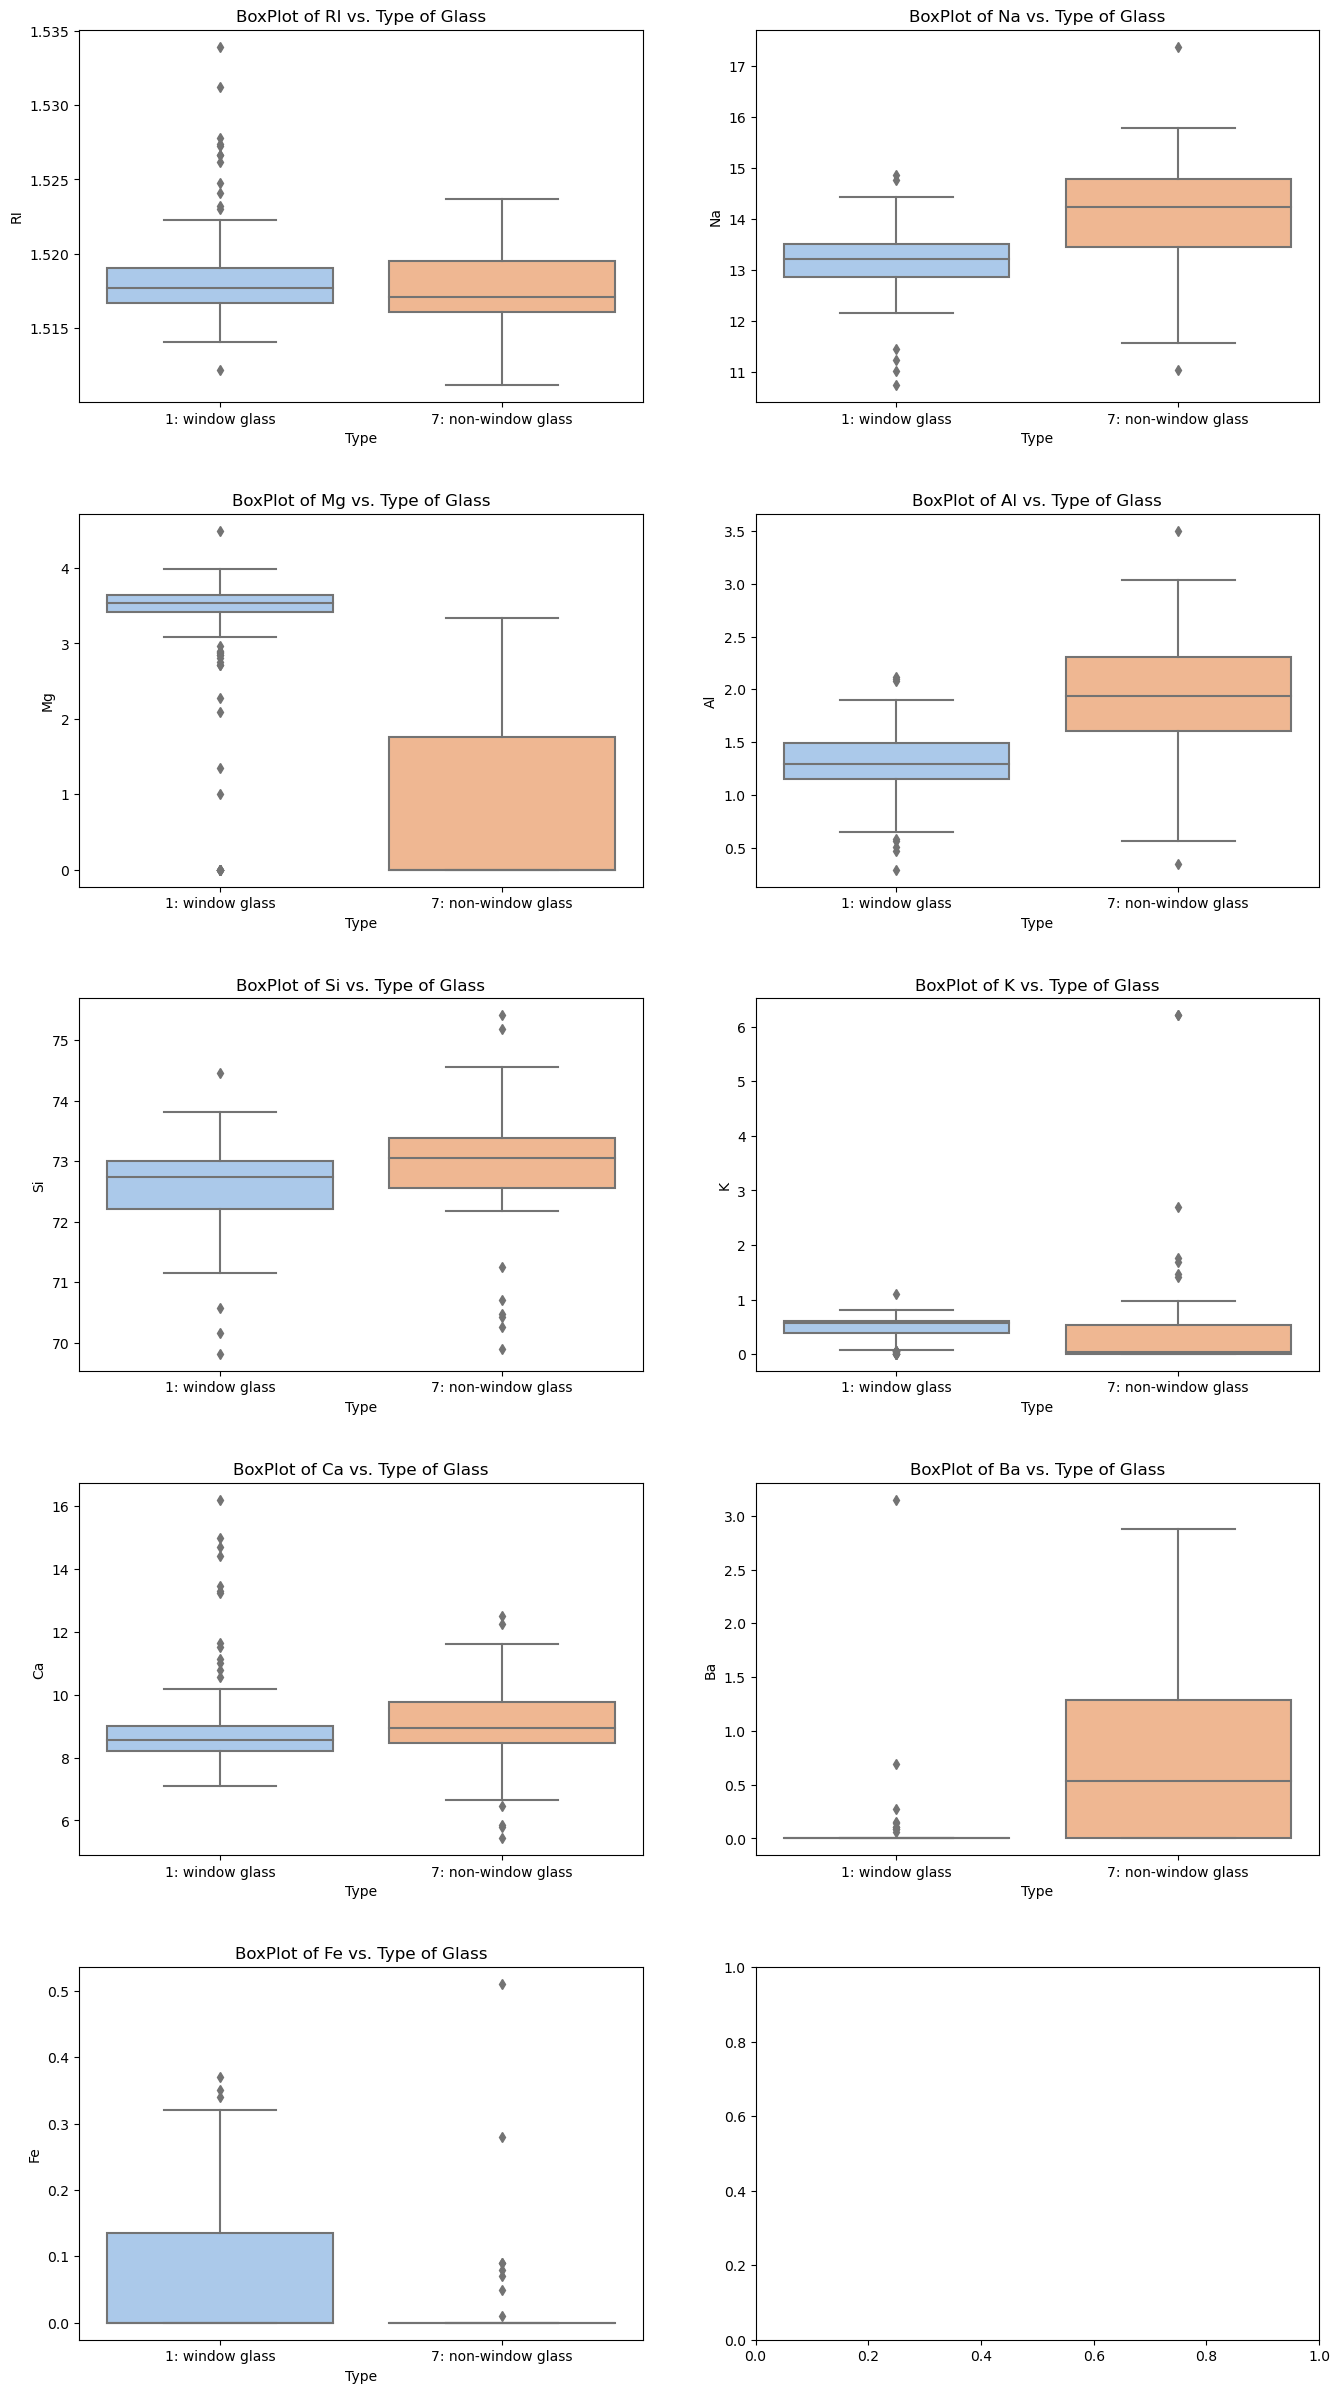

In [39]:
# Visualizing and comparing each independent variable with quality

# setting the palette for the visualizations
sns.set_palette('pastel')

labels = ['1: window glass', '7: non-window glass']

fig, axs = plt.subplots(5, 2, figsize=(16, 30))
for ax, column in zip(axs.flat, df.columns[:-2]):
    sns.boxplot(data=df, y=column, x='Type', ax=ax)
    ax.set_title(f"BoxPlot of {column} vs. Type of Glass")
    ax.set_xticks([0, 1])
    ax.set_xticklabels(labels, size=10)
    
plt.subplots_adjust(hspace=0.3)
plt.show()

**Observations:**
- When analyzing RI, we can see that in the window glass group, there is a presence of outliers and the average in both groups is approximately 1.517.

- In column Na, we can see a greater presence of outliers at the lower end in the window group. The median of the window group is approximately 13.2 and in the non-window group, the median is greater than 14.

- In Mg, a notable difference is evident between the window and non-window groups. The highest concentration of data is between 0 and 1.7 for the non-window group, while for the window group the highest concentration of data is between 3.4 and 3.7.

- In column Al, we can see that for the window group, the largest number of samples is between 1.2 and 1.4, while for the non-window group, it is between 1.6 and 2.3, with the presence of outliers in both groups.

- In the Si column, we observe the presence of outliers in both groups (window and non-window group). Both groups present the greatest amount of data between 72.2 and 73.2

- In column K we observe distant outliers for the non-window group and we observe that the median is very close to zero, while in the window group, the median is approximately 0.8.

- In the Ca column, we observe a greater presence of outliers in the window group, with slightly higher median values for the non-window group.

- In column Ba, a notable difference is evident with a greater amount of data concentrated in the non-window group and with the presence of few outliers in the window group.

- In the Fe column, it is a similar case to Ba with the difference that the window column is where most of the data is presented and in the non-window group the largest number of outliers are presented. In both groups, the median is approximately 0

#### 1.4.2.2 Relation between Refractive Index and Sodium


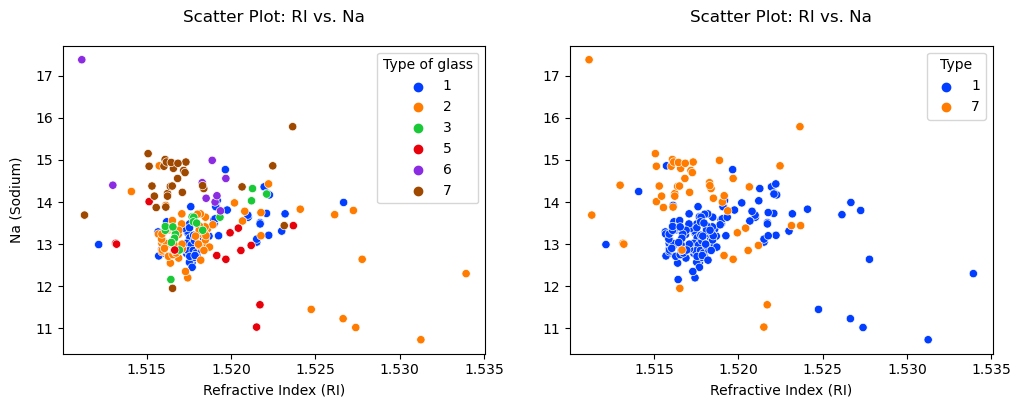

In [40]:
# Scatter plot between "RI" (Refractive Index) and "Na" (Sodium)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df, x='RI', y='Na', hue='Type of glass', palette='bright', ax=axes[0])
sns.scatterplot(data=df, x='RI', y='Na', hue='Type', palette='bright', ax=axes[1])

axes[0].set_title('Scatter Plot: RI vs. Na', size=12, y=1.05)
axes[0].set_xlabel('Refractive Index (RI)', size=10)
axes[0].set_ylabel('Na (Sodium)', size=10, labelpad=8)

axes[1].set_xlabel('Refractive Index (RI)', size=10)
axes[1].set_ylabel('')
axes[1].set_title('Scatter Plot: RI vs. Na', size=12, y=1.05)

plt.show()

Here we are exploring the relationship between refractive index (RI) and sodium content(Na) looking for any patterns or clusters of different glass types. As we can see there is not a clear clustering division by type of glass when the analysis is done with all the classifications 1 to 7, although the clusters are more clear in the graph on the right where analysis considers only two groups: window and non-window glass.

There is more Na present in group 7 (non-window glass)

#### 1.4.2.3 Relation between Aluminium and Barium


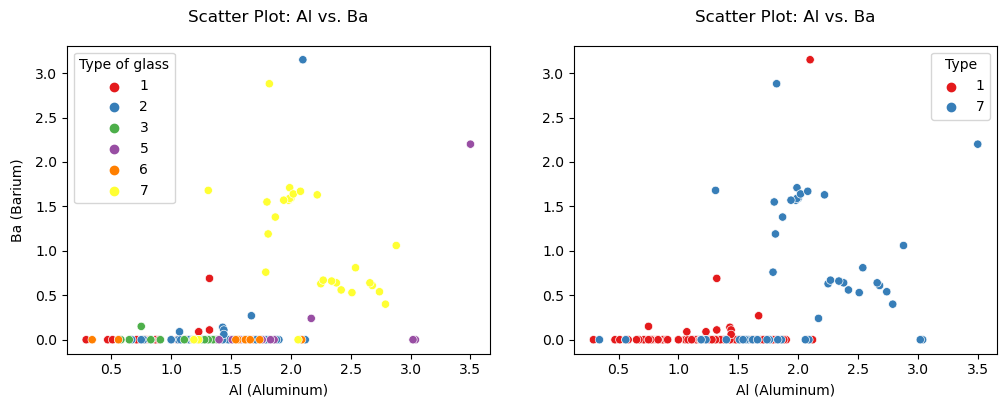

In [41]:
# Scatter plot between "Al" (Aluminum) and "Ba" (Barium)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df, x='Al', y='Ba', hue='Type of glass', palette='Set1', ax=axes[0])
sns.scatterplot(data=df, x='Al', y='Ba', hue='Type', palette='Set1', ax=axes[1])

axes[0].set_title('Scatter Plot: Al vs. Ba', size=12, y=1.05)
axes[0].set_xlabel('Al (Aluminum)', size=10)
axes[0].set_ylabel('Ba (Barium)', size=10, labelpad=8)

axes[1].set_xlabel('Al (Aluminum)', size=10)
axes[1].set_ylabel('')
axes[1].set_title('Scatter Plot: Al vs. Ba', size=12, y=1.05)

plt.show()

- Higher glass type usually have higher values of Ba, specifically group 7 non-window glass.
- On the right scatter plot, we can observe that the Al concentrations of more than 1.5 correspond to non-window glass type. We can infer Al plays an important role in identifying glass type.


#### 1.4.2.4 Relation between Magnesium and  Calcium

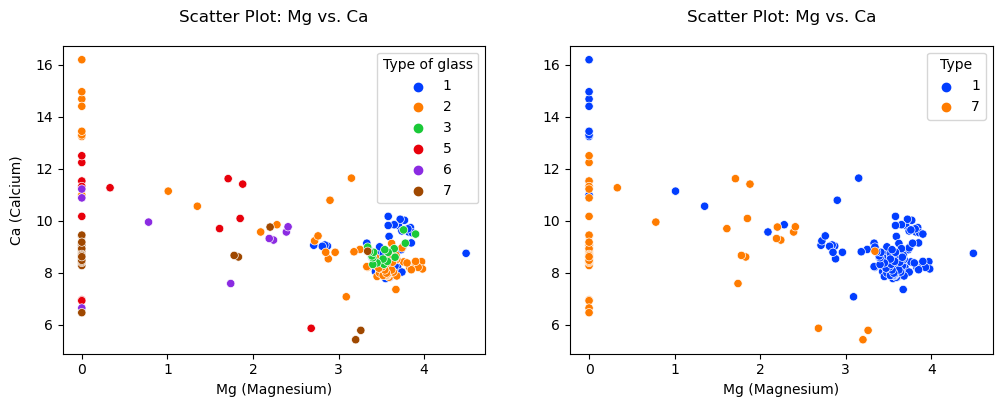

In [42]:
# Scatter plot between "Mg" (Magnesium) and "Ca" (Calcium)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df, x='Mg', y='Ca', hue='Type of glass', palette='bright', ax=axes[0])
sns.scatterplot(data=df, x='Mg', y='Ca', hue='Type', palette='bright', ax=axes[1])

axes[0].set_title('Scatter Plot: Mg vs. Ca', size=12, y=1.05)
axes[0].set_xlabel('Mg (Magnesium)', size=10)
axes[0].set_ylabel('Ca (Calcium)', size=10, labelpad=8)

axes[1].set_xlabel('Mg (Magnesium)', size=10)
axes[1].set_ylabel('')
axes[1].set_title('Scatter Plot: Mg vs. Ca', size=12, y=1.05)

plt.show()

- Higher Glass types have lower levels of Mg(Magnesium) as we can see more clearly on the right scatter plot. The level of Mg of non-window glass is 0 in most records.

- The relationship between Mg and Ca content of glass seems to be negative.
- Ca helps moderately in identifying the glass type.

#### 1.4.2.5 Relation between Silicon and Potassium


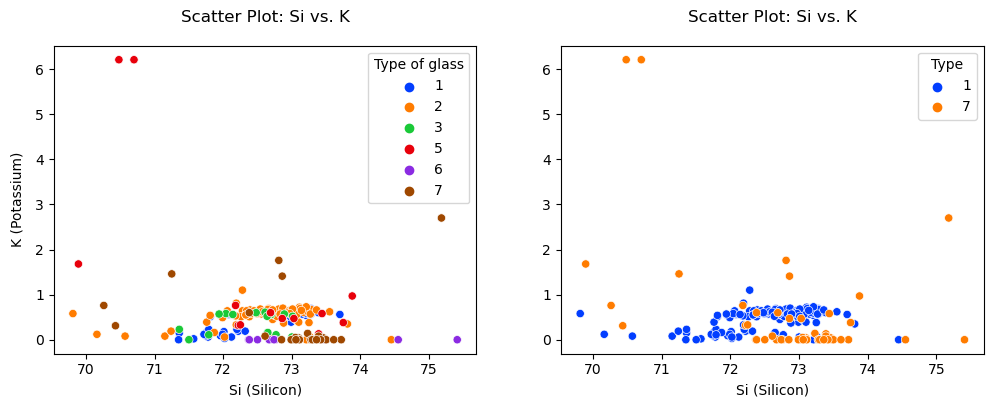

In [43]:
# Scatter plot between "Si" (Silicon) and "K" (Potassium)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df, x='Si', y='K', hue='Type of glass', palette='bright', ax=axes[0])
sns.scatterplot(data=df, x='Si', y='K', hue='Type', palette='bright', ax=axes[1])

axes[0].set_title('Scatter Plot: Si vs. K', size=12, y=1.05)
axes[0].set_xlabel('Si (Silicon)', size=10)
axes[0].set_ylabel('K (Potassium)', size=10, labelpad=8)

axes[1].set_xlabel('Si (Silicon)', size=10)
axes[1].set_ylabel('')
axes[1].set_title('Scatter Plot: Si vs. K', size=12, y=1.05)

plt.show()

- All types of glass have lower values of K
- The relationship between Si and K is not very clear.

#### 1.4.2.6 Relation between Iron and Aluminum


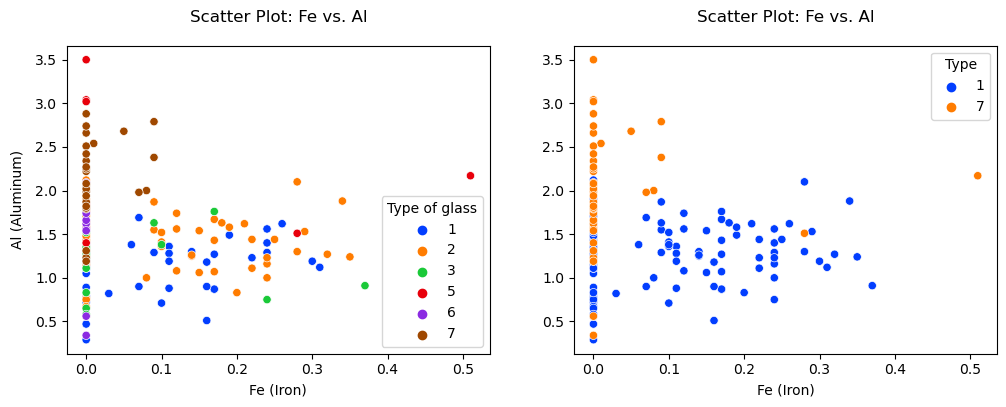

In [44]:
# Scatter plot between "Fe" (Iron) and "Al" (Aluminum)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.scatterplot(data=df, x='Fe', y='Al', hue='Type of glass', palette='bright', ax=axes[0])
sns.scatterplot(data=df, x='Fe', y='Al', hue='Type', palette='bright', ax=axes[1])

axes[0].set_title('Scatter Plot: Fe vs. Al', size=12, y=1.05)
axes[0].set_xlabel('Fe (Iron)', size=10)
axes[0].set_ylabel('Al (Aluminum)', size=10, labelpad=8)

axes[1].set_xlabel('Fe (Iron)', size=10)
axes[1].set_ylabel('')
axes[1].set_title('Scatter Plot: Fe vs. Al', size=12, y=1.05)

plt.show()

As we can see so far, reducing the glass groups to two allows us to observe more clearly the relationship between the independent variables with the target variable.

Here, in the right scatterplot we can observe the levels of "Fe" (Iron) are higher in the window glass group.

### 1.4.3 Multivariate Analysis
#### 1.4.3.1 Pairplot


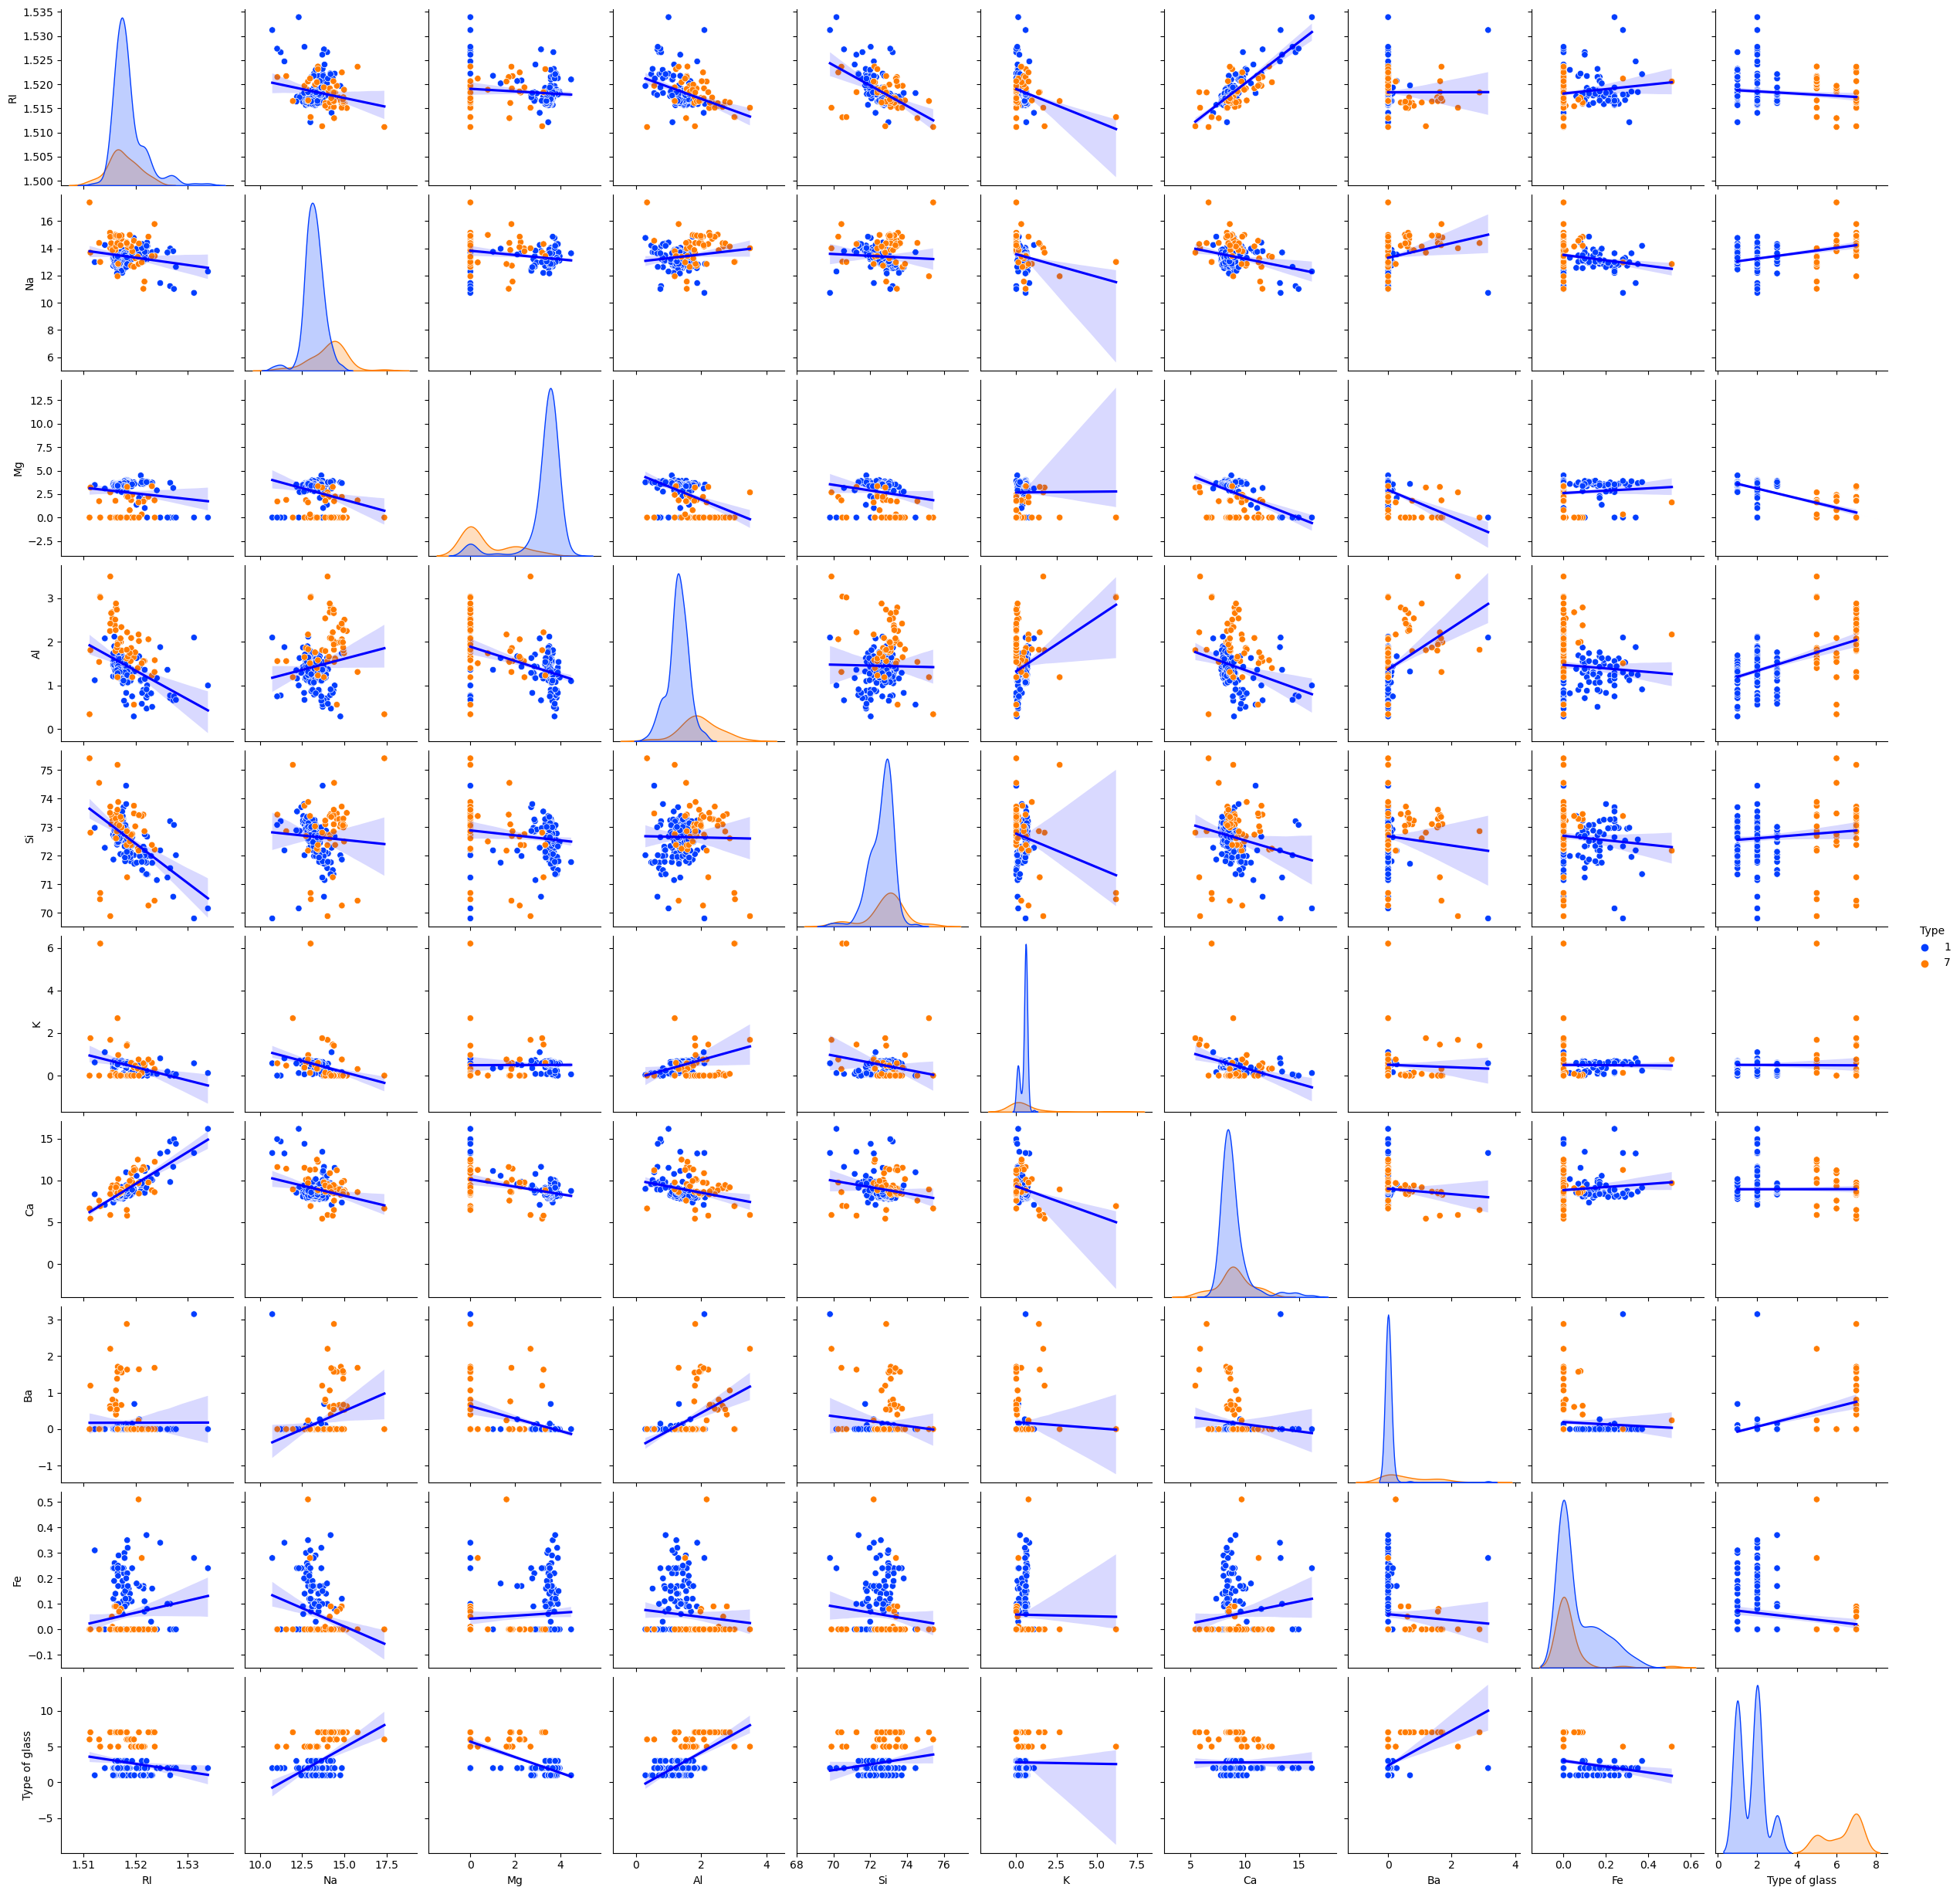

In [45]:
# grid = sns.pairplot(df.drop('Type of glass', axis=1), hue = "Type", palette = "bright")
grid = sns.pairplot(df, hue = "Type", palette = "bright")

# Add a regression line for non-diagonal plots
for ax in grid.axes.flat[1:-1]: # first and last axes are not considered
    if ax.get_xlabel() != ax.get_ylabel():
        sns.regplot(data=df, x=ax.get_xlabel(), y=ax.get_ylabel(), scatter=False, ax=ax, color='b')

plt.show()

The target is strongest related with Mg(Magnesium) and Al(Aluminum) as we can observe in the pairplot.

#### 1.4.3.2 Correlation between target variable and independent variables.

In [46]:
# Calculate the correlation between features
cor = df.corr()
cor

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140,-0.131638
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837,0.456296
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195,-0.757881
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432,0.586513
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725,0.145630
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455,0.052294
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677,0.041853
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896,0.523014
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090,-0.196747
Type of glass,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000,0.941735


In [47]:
# Listing the correlation coeficients with the target variable 
corr_df = cor.unstack().sort_values(ascending=False).reset_index()
corr_df.columns = ['Feature A', 'Feature B', 'Corr coef']
corr_df[(corr_df['Feature A'] == 'Type') & ~(corr_df['Feature B'].str.contains('Type')) ]

,Feature A,Feature B,Corr coef
18,Type,Al,0.586513
21,Type,Ba,0.523014
28,Type,Na,0.456296
39,Type,Si,0.145630
45,Type,K,0.052294
47,Type,Ca,0.041853
77,Type,RI,-0.131638
85,Type,Fe,-0.196747
119,Type,Mg,-0.757881


Here is the list of the correlation coefficients with the target variable to have a clear view of which dependent variables have more influence on the label.


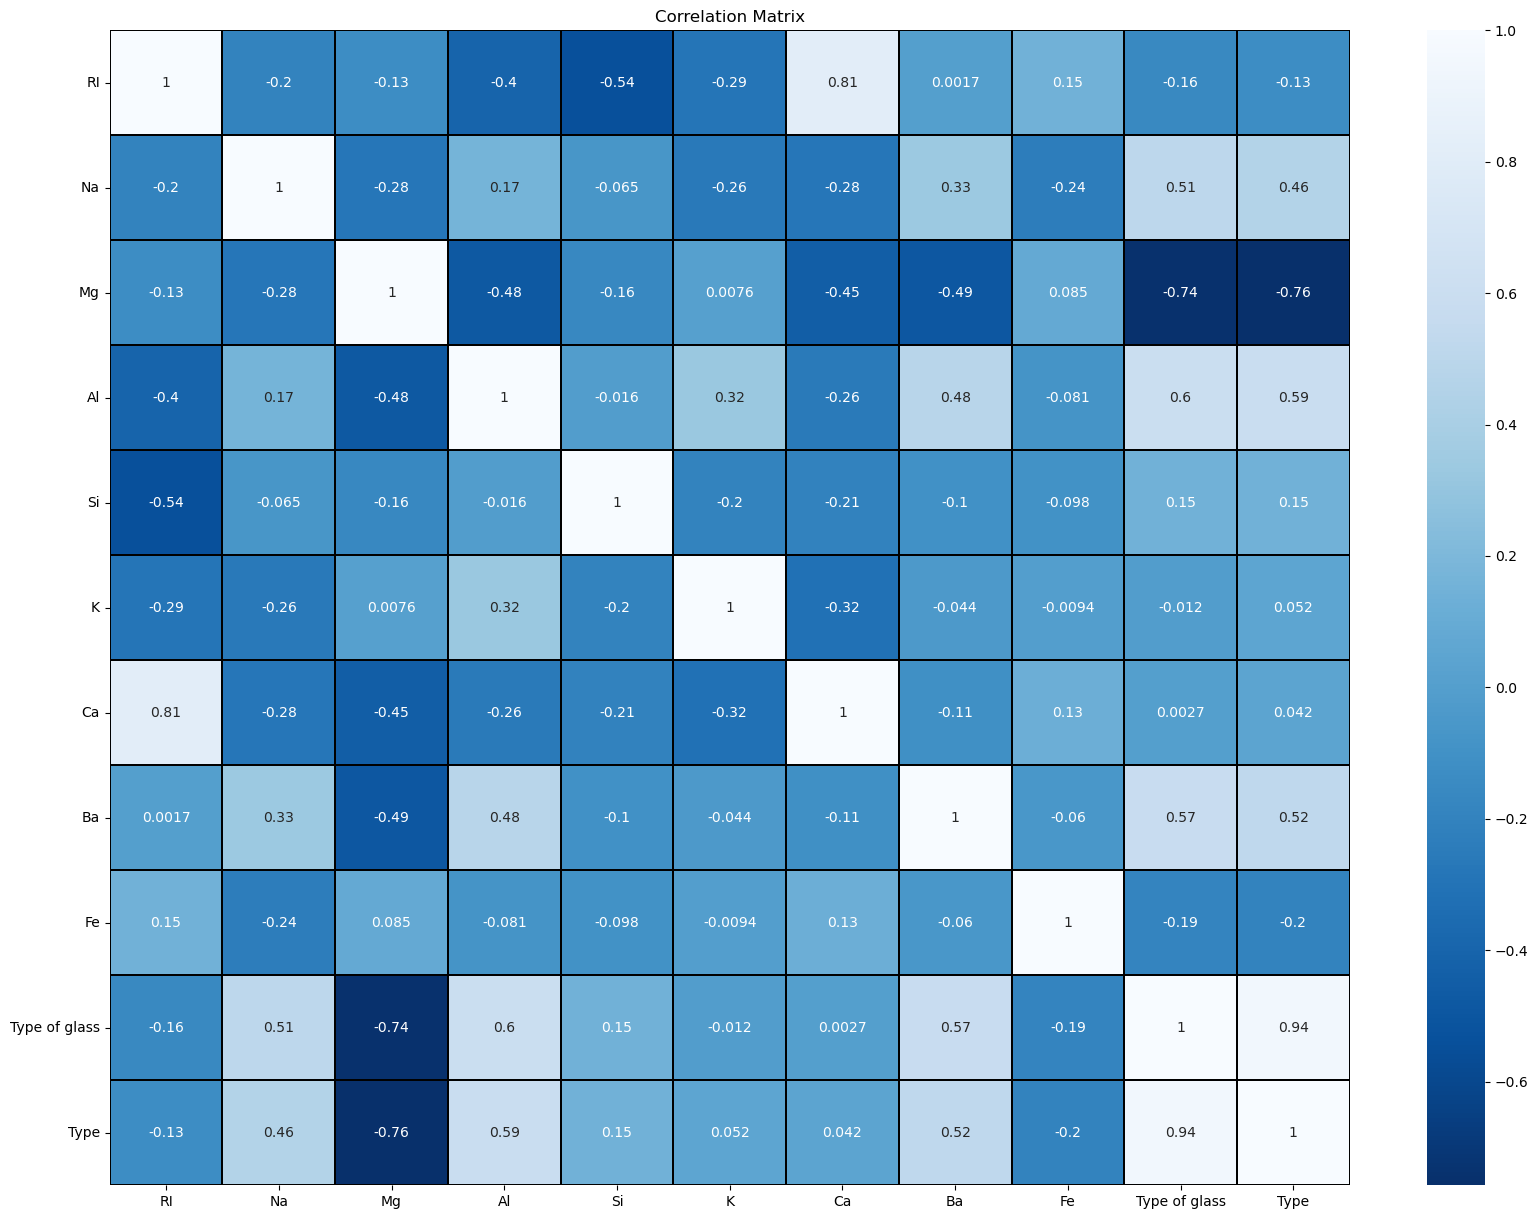

In [48]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(cor, linewidths = 0.1, fmt = ".2g", linecolor = 'black', cmap='Blues_r', annot=True)
plt.yticks(rotation = 0)
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation matrix. We can observe the relation between feature to feature and feature to label.

- This heatmap contains both positive and negative correlation.
- The target have more correlation with Mg(-0.76) and Al(+0.59).
- The columns Al(0.59), Ba(0.52), Na(0.46), and Si(0.15) have positive correlation with the label quality.
- The label is negative correlated with Mg(-0.76), Fe(-0.20), and RI (-0.13).
- The independent variables K and Ca have a low impact on the target variable.
- The strongest positive correlations between the independent features are:
    * Ca/Si: 0.81 (strong)
    * Ba/Al: 0.48 (strong)
    * Ba/Na: 0.33
    * K/Al: 0.32
- The negative strongest correlations between the independent features are:
    * Si/RI: -0.54
    * Ba/Mg: -0.49
    * Al/Mg: -0.48
    * Ca/Mg: -0.45


# 2. Preprocessing Data
## 2.1 Missing values

In Section 1.2 we verify that the dataset has no missing values.

In [49]:
df.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
Type             0
dtype: int64

No missing values to remove.

## 2.2  Removing outliers
1. First we are going to drop the column "Type of glass" because our target variable will be "Type"
2. We apply zscore to detect the outliers 

In [50]:
# First drop the column "Type of glass"  
df_process = df.drop("Type of glass", axis=1)

In [51]:
# Detect outliers with zscore method
from scipy.stats import zscore

z = np.abs(zscore(df_process))
z

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.879840,0.289558,1.257238,0.706370,1.133248,0.673480,0.143466,0.353808,0.588301,0.561084
1,0.243816,0.596403,0.639311,0.180863,0.097037,0.028962,0.790201,0.353808,0.588301,0.561084
2,0.716412,0.154546,0.604596,0.182950,0.433746,0.167073,0.825349,0.353808,0.588301,0.561084
3,0.227291,0.238216,0.701798,0.322346,0.058368,0.109149,0.516041,0.353808,0.588301,0.561084
4,0.306608,0.164573,0.653197,0.423405,0.550299,0.078457,0.621487,0.353808,0.588301,0.561084
...,...,...,...,...,...,...,...,...,...,...
209,0.699888,0.903249,1.860172,2.891336,0.058368,0.642789,0.158812,1.778672,0.588301,1.782266
210,0.494986,1.860605,1.860172,1.092483,0.524398,0.765554,0.389506,2.844912,0.588301,1.782266
211,0.760865,1.173272,1.860172,1.153118,0.990612,0.765554,0.361387,2.945501,0.588301,1.782266
212,0.607351,1.197820,1.860172,0.991424,1.236668,0.765554,0.333268,2.804676,0.588301,1.782266


In [52]:
# threshold = 3
df_new = df_process[(z<3).all(axis=1)]

print(f"{df_process.shape[0] - df_new.shape[0]} rows with outliers were deleted.")
print(f"This represent {round((df_process.shape[0] - df_new.shape[0]) / df_process.shape[0] *100, 2)}% of the data.")
print(f"In the new dataset there are {df_new.shape[0]} rows and {df_process.shape[1]} columns.")
df_process = df_new.copy()
df_process

20 rows with outliers were deleted.
This represent 9.39% of the data.
In the new dataset there are 193 rows and 10 columns.


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
208,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7


## 2.3 Skewness Correction


In [53]:
# Checking the skewness in the data
df_skew = df_process.skew().sort_values(ascending=False).to_frame("Skew")
df_skew

,Skew
Ba,3.178256
Fe,1.478611
Type,1.455790
Ca,1.089590
RI,0.972271
Al,0.700499
Na,0.384484
K,0.295387
Si,-0.436027
Mg,-1.521807


Considering the skewness of the continuous numerical columns:

- Ba	3.178256
- Fe	1.478611
- Ca	1.089590
- RI	0.972271
- Al	0.700499
- Mg	-1.521807

is greater than 0.5 or lower than -0.5, we are going to apply methods to remove it. The variable "Type" is not considered since it is categorical.

In [54]:
# Checking skewness using cuberoot method and log method
skew_columns = ['Ba', 'Fe', 'Ca', 'RI', 'Al', 'Mg']
df_transformed = pd.DataFrame()

for col in skew_columns:
    df_transformed[f"{col}_cbrt"] = np.cbrt(df_process[col])
    df_transformed[f"{col}_log"] = np.log(df_process[col])
    
# Adding the other columns
df_transformed = pd.concat([df_transformed, df_process[skew_columns]], axis=1)

In [55]:
# Comparing which transform method give better results
df_transformed.skew().sort_index(ascending=False).to_frame("Skewness")

,Skewness
RI_log,0.965084
RI_cbrt,0.967479
RI,0.972271
Mg_log,NaN
Mg_cbrt,-1.890893
Mg,-1.521807
Fe_log,NaN
Fe_cbrt,0.875093
Fe,1.478611
Ca_log,0.347263


After comparing the resulting skewness, we are going to apply as follows:
- cuberoot method give a better skewness for Ba, Fe, and Al.
- log method is better for Ca and RI.
- Mg will not be transformed because the result skewness -1.89 is not better than -1.52.

In [56]:
# Copy the transform data to the df_process dataframe
for col in ['Ba','Fe','Al']:
    df_process[col] = df_transformed[f"{col}_cbrt"]

for col in ['Ca','RI']:
    df_process[col] = df_transformed[f"{col}_log"]

df_process.skew().sort_values(ascending=False).to_frame("Skewness after transform")

,Skewness after transform
Ba,2.198820
Type,1.455790
RI,0.965084
Fe,0.875093
Na,0.384484
Ca,0.347263
K,0.295387
Al,-0.322260
Si,-0.436027
Mg,-1.521807


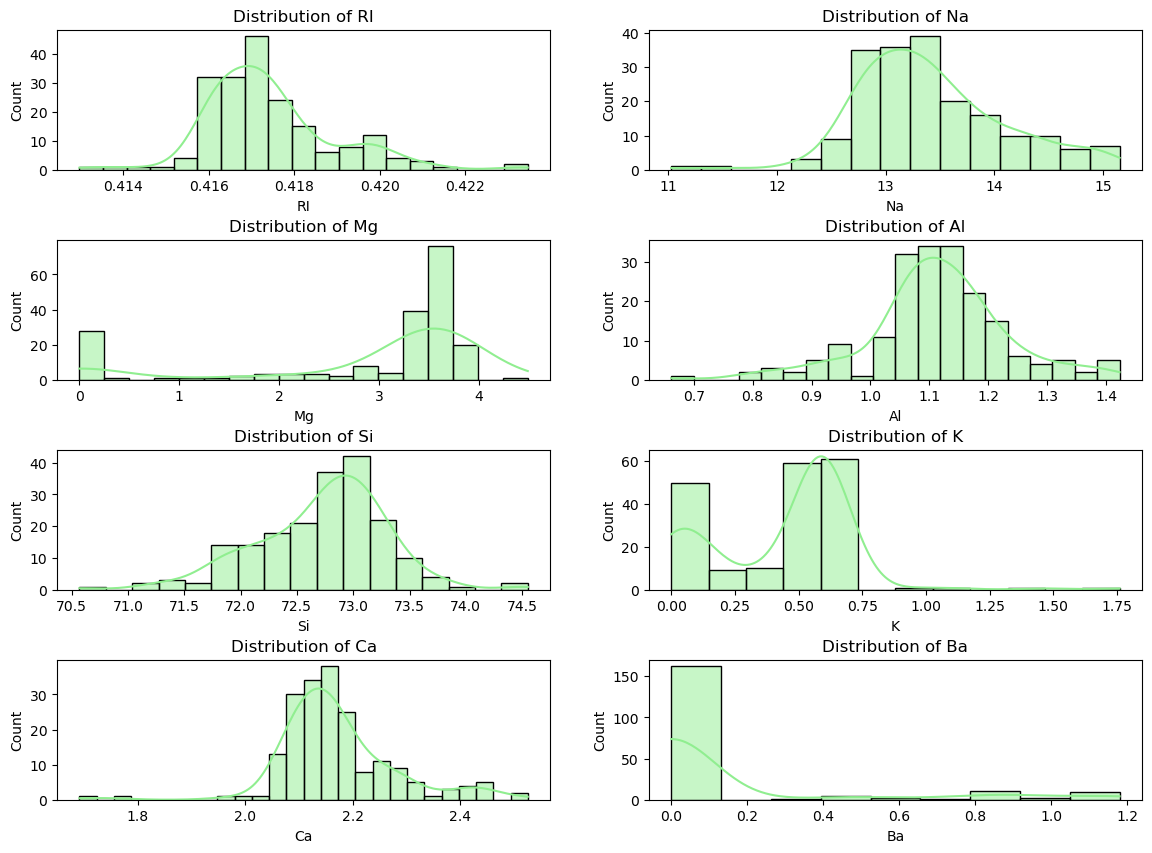

In [57]:
# Visualizing the distribution of the columns after removing skewness
fig, axs = plt.subplots(4, 2, figsize=(14, 10))
for ax, column in zip(axs.flat, df_process.columns[:-1]):
    sns.histplot(data=df_process, x=column, ax=ax, kde=True, color='lightgreen')
    ax.set_title(f"Distribution of {column}")

plt.subplots_adjust(hspace=0.5)
plt.show()

## 2.4 Feature Scaling using Standard Scalarization


### 2.4.1 Separating features and label

In [58]:
# Separating the independent and target variables into x and y 
x = df_process.drop("Type", axis=1)
y = df_process['Type']

print(f"Feature Dimension = {x.shape}")
print(f"Label Dimension = {y.shape}")

Feature Dimension = (193, 9)
Label Dimension = (193,)


### 2.4.2 Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.308881,0.338598,1.235597,-0.693567,-1.627964,-1.326595,-0.019157,-0.416569,-0.680595
1,-0.189093,0.711257,0.554625,-0.050415,0.007672,0.166308,-1.043086,-0.416569,-0.680595
2,-0.820126,0.174628,0.516368,0.348040,0.455320,-0.153600,-1.102131,-0.416569,-0.680595
3,-0.167040,-0.302375,0.623487,-0.214872,-0.198935,0.486216,-0.595068,-0.416569,-0.680595
4,-0.272903,-0.212937,0.569928,-0.336020,0.610274,0.415125,-0.764815,-0.416569,-0.680595
...,...,...,...,...,...,...,...,...,...
188,-0.723006,1.426762,-2.199867,2.426822,0.214279,-1.539867,0.690194,2.063771,-0.680595
189,-0.798052,1.083916,-2.199867,2.626079,-0.198935,-1.255504,0.423016,2.689053,-0.680595
190,-0.524393,2.246611,-2.199867,1.223843,0.575840,-1.539867,-0.395414,3.138481,-0.680595
191,1.150430,1.411856,-2.199867,1.277311,1.195660,-1.539867,-0.351627,3.175362,-0.680595


We have scaled the data using the Standard Scalarization method to overcome the issue of biases.

## 2.5 Muticollinearity Analysis and Feature Selection

### 2.5.1 Checking Variance Inflation Factor (VIF)


In [60]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
2,Mg,42.084375
6,Ca,29.056433
1,Na,16.977269
4,Si,11.397541
5,K,7.345681
3,Al,6.110079
7,Ba,5.447298
0,RI,4.930595
8,Fe,1.056915


By checking VIF values we can find the features causing multicollinearity problem. Here we can find the feature Mg, Ca, Na and Si have VIF value greater than 10 which means they have high correlation with other features. 

Considering the relationship between the target variable and Ca is weaker compared to the relation of Mg and the target variable, we will drop Ca losing 11% of the data approximately.

In [61]:
x1 = x.drop('Ca', axis=1)

vif = pd.DataFrame()
vif['Features'] = x1.columns
vif['VIF values'] = [variance_inflation_factor(x1.values, i) for i in range(len(x1.columns))]

vif.sort_values(by='VIF values', ascending=False)

,Features,VIF values
2,Mg,4.866654
0,RI,4.770396
4,Si,4.511179
1,Na,4.098489
3,Al,3.118087
5,K,2.627784
6,Ba,2.244434
7,Fe,1.050669


So, we have solved the multicollinearity issue. Now we are going to balance the dataset and then move ahead from model building.

In [62]:
x = x1

## 2.6 Balancing the Dataset

As we see previously in the Section 1.4.1.1. The dataset is imbalance:  162 (76.1%) records are classified as window glass and only 51 (23.9%). So, we are going to apply SMOTE for oversampling the data. 

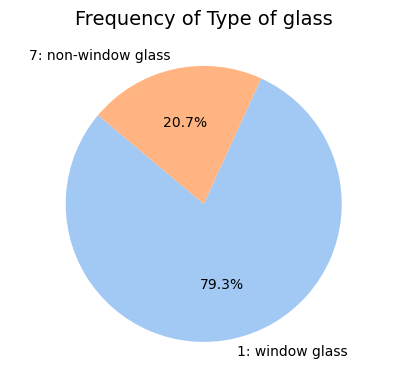

In [63]:
# Count the frequencies of each glass type
type_counts = y.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(type_counts, labels=['1: window glass', '7: non-window glass'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Type of glass", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [64]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

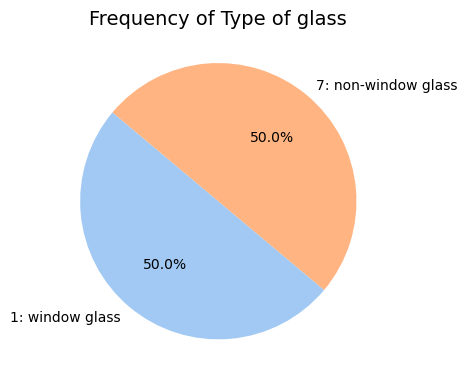

In [65]:
# Count the frequencies of each glass type
type_counts = y1.value_counts()

# Create a pie plot
plt.figure(figsize=(5, 4))
plt.pie(type_counts, labels=['1: window glass', '7: non-window glass'], autopct='%1.1f%%', startangle=140)

plt.title("Frequency of Type of glass", size=14, y=1.05)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [66]:
X = x1
Y = y1

Since the data is balanced, we can build machine learning classification models.

# 3. Modeling


## 3.1 Finding the best random state

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = RandomForestClassifier()
random_state, acc = find_best_random_state(model, X, Y) 
print(f"Best accuracy is {round(acc,4)} at random_state {random_state}")

Best accuracy is 1.0 at random_state 39


Best accuracy is 1.0 at random_state 13

## 3.2 Creating train test split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state)
print("x_train shape: ", x_train.shape)
print("x_test shape:  ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

x_train shape:  (214, 8)
x_test shape:   (92, 8)
y_train shape:  (214,)
y_test shape:   (92,)


## 3.3 Classification Algorithms¶

In [69]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [70]:
# Functions 
def calc_accuracy(model, id_model):
    ''' Calculate the accuracy of the model. Return the accuracy, training accuracy, and the predicted values.'''
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    acc = accuracy_score(y_test, y_pred)
    acc_train = model.score(x_train, y_train)
    
    print(f"\nModel: {id_model}")
    print(f"Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"Classification report: \n {classification_report(y_test, y_pred)}" )
    print(f"Training Accuracy using {id_model} is {acc_train*100.0:.2f}%")
    print(f"The accuracy score using {id_model} is {round(acc*100.0, 2)}%")
    
    return [acc, acc_train, y_pred]

In [71]:
models = {'RandomForestClassifier' : RandomForestClassifier(), 
          'ExtraTreesClassifier': ExtraTreesClassifier(),
          'LogisticRegression': LogisticRegression(),
          'SVC': SVC(),
          'GradientBoostingClassifier': GradientBoostingClassifier(), 
          'AdaBoostClassifier': AdaBoostClassifier(), 
          'BaggingClassifier': BaggingClassifier()}

# Setting up for saving the results of each model
df_model_accuracy = pd.DataFrame(columns=['id','Model','Training Accuracy','Model Accuracy Score'])
y_pred = {}
    

### 3.3.1 RandomForestClassifier

In [72]:
id_model = 'RandomForestClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: RandomForestClassifier
Confusion matrix: 
 [[47  1]
 [ 0 44]]
Classification report: 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99        48
           7       0.98      1.00      0.99        44

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

Training Accuracy using RandomForestClassifier is 100.00%
The accuracy score using RandomForestClassifier is 98.91%


### 3.3.2 Extra Trees Classifier

In [73]:
id_model = 'ExtraTreesClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: ExtraTreesClassifier
Confusion matrix: 
 [[48  0]
 [ 1 43]]
Classification report: 
               precision    recall  f1-score   support

           1       0.98      1.00      0.99        48
           7       1.00      0.98      0.99        44

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

Training Accuracy using ExtraTreesClassifier is 100.00%
The accuracy score using ExtraTreesClassifier is 98.91%


### 3.3.3 Logistic Regression

In [74]:
id_model = 'LogisticRegression'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: LogisticRegression
Confusion matrix: 
 [[47  1]
 [ 2 42]]
Classification report: 
               precision    recall  f1-score   support

           1       0.96      0.98      0.97        48
           7       0.98      0.95      0.97        44

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92

Training Accuracy using LogisticRegression is 97.20%
The accuracy score using LogisticRegression is 96.74%


### 3.3.4 Support Vector Machine Classifier

In [75]:
id_model = 'SVC'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: SVC
Confusion matrix: 
 [[47  1]
 [ 0 44]]
Classification report: 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99        48
           7       0.98      1.00      0.99        44

    accuracy                           0.99        92
   macro avg       0.99      0.99      0.99        92
weighted avg       0.99      0.99      0.99        92

Training Accuracy using SVC is 99.07%
The accuracy score using SVC is 98.91%


### 3.3.5 Gradient Boosting Classifier

In [76]:
id_model = 'GradientBoostingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: GradientBoostingClassifier
Confusion matrix: 
 [[48  0]
 [ 2 42]]
Classification report: 
               precision    recall  f1-score   support

           1       0.96      1.00      0.98        48
           7       1.00      0.95      0.98        44

    accuracy                           0.98        92
   macro avg       0.98      0.98      0.98        92
weighted avg       0.98      0.98      0.98        92

Training Accuracy using GradientBoostingClassifier is 100.00%
The accuracy score using GradientBoostingClassifier is 97.83%


### 3.3.6 AdaBoost Classifier

In [77]:
id_model = 'AdaBoostClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: AdaBoostClassifier
Confusion matrix: 
 [[47  1]
 [ 4 40]]
Classification report: 
               precision    recall  f1-score   support

           1       0.92      0.98      0.95        48
           7       0.98      0.91      0.94        44

    accuracy                           0.95        92
   macro avg       0.95      0.94      0.95        92
weighted avg       0.95      0.95      0.95        92

Training Accuracy using AdaBoostClassifier is 100.00%
The accuracy score using AdaBoostClassifier is 94.57%


### 3.3.7 Bagging Classifier

In [78]:
id_model = 'BaggingClassifier'
model = models[id_model]

# Calculating accuracy metrics
acc, acc_train, pred = calc_accuracy(model, id_model)

# Saving the results
model_metrics = {'id': id_model, 'Model': model,'Training Accuracy': acc_train,'Model Accuracy Score': acc}
df_model_accuracy = df_model_accuracy.append(model_metrics, ignore_index=True)
y_pred[id_model] = pred


Model: BaggingClassifier
Confusion matrix: 
 [[48  0]
 [ 0 44]]
Classification report: 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        44

    accuracy                           1.00        92
   macro avg       1.00      1.00      1.00        92
weighted avg       1.00      1.00      1.00        92

Training Accuracy using BaggingClassifier is 100.00%
The accuracy score using BaggingClassifier is 100.0%


## 3.4 Comparing models

### 3.4.1 Comparing accuracy of each model

In [79]:
df_model_accuracy = df_model_accuracy.sort_values(by='Model Accuracy Score', ascending=False)
display(df_model_accuracy)

,id,Model,Training Accuracy,Model Accuracy Score
6,BaggingClassifier,(DecisionTreeClassifier(random_state=124332834...,1.000000,1.000000
0,RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.989130
1,ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1606812197),...",1.000000,0.989130
3,SVC,SVC(),0.990654,0.989130
4,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1.000000,0.978261
2,LogisticRegression,LogisticRegression(),0.971963,0.967391
5,AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",1.000000,0.945652


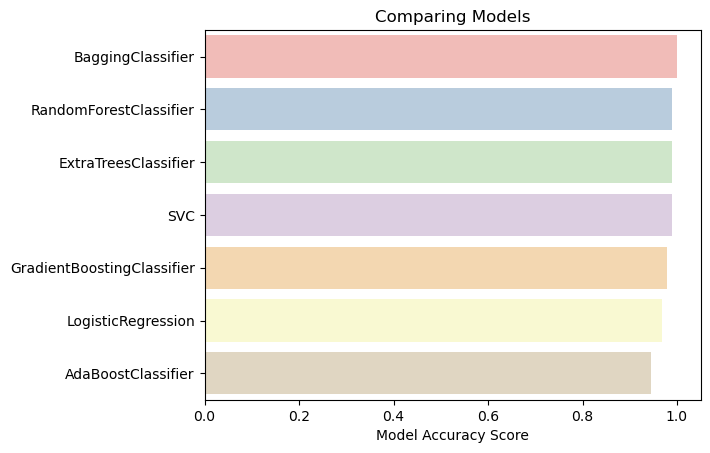

In [80]:
sns.barplot(y= 'id', x= 'Model Accuracy Score', data= df_model_accuracy, palette='Pastel1')
plt.title('Comparing Models')
plt.xlabel('Model Accuracy Score')
plt.ylabel('');

The model with the best accuracy is RandomForestClassifier with 100% of accuracy. LogisticRegression and Support Vector Classifier also reached 100% of accuracy.

### 3.4.2 Cross validation score
In order to evaluate the performance of the models we are going to user Cross-validation technique.

In [81]:
def checking_cvscore(id_model, model, y_pred):
    score = cross_val_score(model, X, Y, cv=5, scoring='accuracy')
    
    score_mean = score.mean()
    diff = accuracy_score(y_test, y_pred) - score_mean
    
    print(f"\n::: Model: {id_model}::: \nscore:{score}")
    print(f"Score mean: {score_mean:.4f}")
    print(f"Difference between Accuracy score and cross validation score is {diff:.4f}")
    return [score_mean, diff]

In [82]:
# Define the new columns for CV metrics
df_model_accuracy['CV score mean'] = np.NaN
df_model_accuracy['Diff Acc and cv score'] = np.NaN
# Setting the id model as index
df_model_accuracy.set_index("id", inplace=True)

In [83]:
# Evaluate cross-validation for each model and save the scores.
for id_model, model in models.items():
    score_mean, diff = checking_cvscore(id_model, model, y_pred[id_model])
    
    df_model_accuracy.loc[id_model, 'CV score mean'] = score_mean
    df_model_accuracy.loc[id_model, 'Diff Acc and cv score'] = diff
    


::: Model: RandomForestClassifier::: 
score:[0.96774194 1.         0.96721311 0.90163934 0.98360656]
Score mean: 0.9640
Difference between Accuracy score and cross validation score is 0.0251

::: Model: ExtraTreesClassifier::: 
score:[0.98387097 1.         0.98360656 0.96721311 0.96721311]
Score mean: 0.9804
Difference between Accuracy score and cross validation score is 0.0087

::: Model: LogisticRegression::: 
score:[0.9516129  0.98360656 1.         0.90163934 0.98360656]
Score mean: 0.9641
Difference between Accuracy score and cross validation score is 0.0033

::: Model: SVC::: 
score:[0.96774194 0.98360656 1.         0.91803279 0.98360656]
Score mean: 0.9706
Difference between Accuracy score and cross validation score is 0.0185

::: Model: GradientBoostingClassifier::: 
score:[1.         1.         0.98360656 0.86885246 0.98360656]
Score mean: 0.9672
Difference between Accuracy score and cross validation score is 0.0110

::: Model: AdaBoostClassifier::: 
score:[0.9516129  0.983606

In [84]:
# Present the metrics to eval the best model
df_model_accuracy.sort_values(by=['Model Accuracy Score', 'CV score mean','Diff Acc and cv score'], ascending=[False, False, True])

,Model,Training Accuracy,Model Accuracy Score,CV score mean,Diff Acc and cv score
id,,,,,
BaggingClassifier,(DecisionTreeClassifier(random_state=124332834...,1.000000,1.000000,0.954257,0.045743
ExtraTreesClassifier,"(ExtraTreeClassifier(random_state=1606812197),...",1.000000,0.989130,0.980381,0.008750
SVC,SVC(),0.990654,0.989130,0.970598,0.018533
RandomForestClassifier,"(DecisionTreeClassifier(max_features='auto', r...",1.000000,0.989130,0.964040,0.025090
GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,1.000000,0.978261,0.967213,0.011048
LogisticRegression,LogisticRegression(),0.971963,0.967391,0.964093,0.003298
AdaBoostClassifier,"(DecisionTreeClassifier(max_depth=1, random_st...",1.000000,0.945652,0.954257,-0.008605


When considering only the Model Accuracy Score the best model were RandomForestClassifier, LogisticRegression and SVC, but after applying cross-validation technique we observe the better cross-validation score is for ExtraTreesClassifier and the difference with accuracy score is 0.012.

**ExtraTreesClassifier is our best Model**

## 3.5 Hyper Parameter Tuning
### 3.5.1 Finding the best parameters for ExtraTreesClassifier

In [85]:
random_state

39

In [86]:
# Support Vector Classifier
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini', 'entropy'],
             'random_state': [random_state, 10, 50, 1000],
             'max_depth':[0, 10, 20],
             'n_jobs': [-2, -1, 1],
             'n_estimators': [50, 100, 200, 300]}

# Build the model 
model = ExtraTreesClassifier()

# Perform search with cross validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [39, 10, 50, 1000]})

In [87]:
# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters for ExtraTreesClassifier model:")
best_params

Best Parameters for ExtraTreesClassifier model:


{'criterion': 'gini',
 'max_depth': 20,
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': 50}

These are the best parameters for training the model.

In [88]:
best_model

ExtraTreesClassifier(max_depth=20, n_estimators=200, n_jobs=-2, random_state=50)

## 3.6 Final Model

In [89]:
# Create the model with the best parameters
best_model = ExtraTreesClassifier (criterion = 'gini', max_depth = 10, n_estimators = 50, n_jobs = -2, random_state =1000)

best_model.fit(x_train, y_train)
y_pred = best_model.predict(x_test)

# Check the accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score: {round(acc*100,2)}%")

accuracy_score: 98.91%


## 3.6.1 Plotting ROC and compare AUC for all the models used

In [90]:
models

{'RandomForestClassifier': RandomForestClassifier(),
 'ExtraTreesClassifier': ExtraTreesClassifier(),
 'LogisticRegression': LogisticRegression(),
 'SVC': SVC(),
 'GradientBoostingClassifier': GradientBoostingClassifier(),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'BaggingClassifier': BaggingClassifier()}

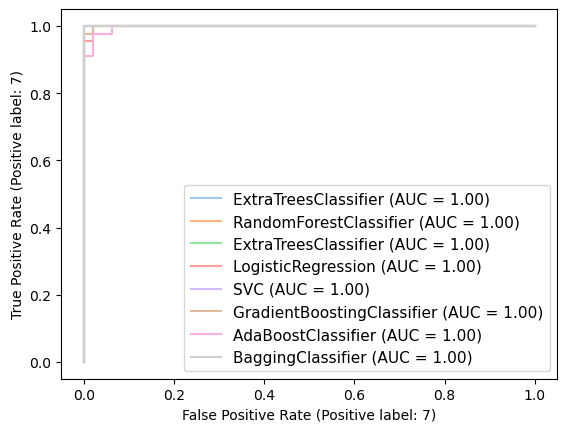

In [91]:
# Plotting for all the models used here
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

# First Plot ROC Curve from Best Model
plot_roc_curve(best_model, x_test, y_test, ax=ax)

# Plot each ROC Curve from each model 
for id_model, model in models.items(): 
    plot_roc_curve(model, x_test, y_test, ax=ax)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

Here we can see area under curve for each model used. The  light blue one is the best model.

### 3.6.2 Plotting ROC and compare AUC for  the best model 

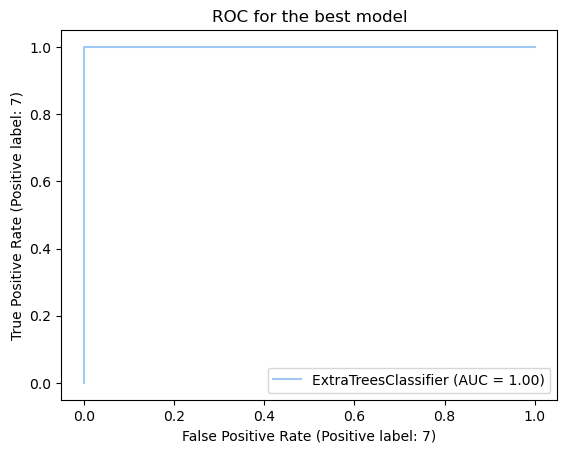

In [92]:
# Let's check the AUC for the best model after hyer parameter tuning
plot_roc_curve(best_model, x_test, y_test)
plt.title("ROC for the best model")
plt.show() 

### 3.6.3 Saving the model

In [93]:
# Saving the model using .pkl
import joblib
joblib.dump(best_model, "Glass_identification_model.pkl")

['Glass_identification_model.pkl']

### 3.6.4  Predicting the saved model

In [94]:
# Lets load the saved model and get the predictions
model = joblib.load("Glass_identification_model.pkl")

# Prediction
prediction = model.predict(x_test)

# Accuracy score of the prediction with the model selected
print(f"Accuracy score: {accuracy_score(y_test, prediction)*100:.3f} %")

# Dataframe to compare the predicted values vs the original values
df_result = pd.DataFrame()
df_result['Predicted'] = prediction
df_result['Original'] = np.array(y_test)
df_result.T

Accuracy score: 98.913 %


,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
Predicted,1,7,7,1,7,7,7,1,1,7,...,1,1,1,1,1,1,1,7,7,7
Original,1,7,7,1,7,7,7,1,7,7,...,1,1,1,1,1,1,1,7,7,7


These are the predicted values in a dataset to compared the prediction with the test data.

**Final Conclusions:**

- The given dataset consists of 10 features, however, we are doing uni-variate analysis only on 8 features because the "id number" does not give much information for prediction.
- A cutoff was established for the target variable, divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
- The best model was ExtraTreesClassifier with accuracy_score: 98.913%
- Eliminating the outliers represented the elimination of 9.39% of the total records (20 rows).
- In order to avoid multicollinearity issue we drop Ca feature considering it has a weak impact in the label.

_I would be glad if you could suggest me any improvements._

**Notes:**
- In order to do a better data analysis I investigated other approaches from different sources. These references as inspiration help me with the EDA process. But not in order to make an exact copy of the analysis or the code.
- All functions used in this project are my own. As we have progressed in the assignments, I have been improving the code so that they are more general and can be applied in different scenarios. I decided to do it this way to improve and progress my knowledge of python. 

By Monica Atiaga